# Imputation des données manquantes


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import plotly.graph_objects as go


from datetime import datetime

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,6)})

In [2]:
# Importation des deux jeux de données de vente et de meteo
df = pd.read_csv('dataset_food90.csv')
data_met = pd.read_csv("dataset_meteo.csv")
# concaténation 
data = pd.concat([df,data_met], axis=1)
data  = data.drop(columns = ['datetime', 'weekday' , "icon" , "year"])

# Indexé le dataset par le temps
data['date'] = pd.to_datetime(data['date'])
data.set_index('date',inplace=True)

# Frequence journaliere 
data.index.freq = 'D'

In [3]:
data.head()

,sales,prix,wday,month,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI,temp,feelslike,humidity,precip,preciptype,windspeed,visibility,cloudcover,uvindex
date,,,,,,,,,,,,,,,,,,
2011-01-29,130,1.25,1,1,NaN,NaN,NaN,NaN,0,-1.4,-4.8,82.4,0.403,snow,24.8,9.4,97.4,5
2011-01-30,153,1.25,2,1,NaN,NaN,NaN,NaN,0,-6.0,-11.2,71.2,0.000,NaN,19.4,14.3,53.9,5
2011-01-31,119,1.25,3,1,NaN,NaN,NaN,NaN,0,-7.8,-15.0,78.1,5.395,snow,28.2,7.9,99.1,2
2011-02-01,80,1.25,4,2,NaN,NaN,NaN,NaN,0,-8.4,-18.0,81.3,3.913,snow,52.4,5.4,95.8,2
2011-02-02,80,1.25,5,2,NaN,NaN,NaN,NaN,1,-9.4,-17.0,67.7,2.819,snow,59.7,9.6,51.9,4


In [4]:
data.isna().sum()

sales              0
prix               0
wday               0
month              0
event_name_1    1783
event_type_1    1783
event_name_2    1937
event_type_2    1937
snap_WI            0
temp               0
feelslike          0
humidity           0
precip             0
preciptype      1181
windspeed          0
visibility         0
cloudcover         0
uvindex            0
dtype: int64

Nous pouvons voir qui'l y'a beacoup de donnes manquantes concernant les variables event_name_2 et event_type_2, nous allons donc les retirer du jeu de données.

Pour le type de precipitation, les valeurs manquantes representent les jours sans précipitation.

In [5]:
print(data.preciptype.unique())
print(sum(data.preciptype == 'rain' ),sum(data.preciptype == 'snow' ),sum(data.preciptype == 'rain,snow' ))

['snow' nan 'rain,snow' 'rain']
552 83 125


In [6]:
#Quasiment sans valeurs, suppression des variables
data = data.drop(columns=['event_name_2','event_type_2'])

In [10]:
#Que des valeurs nan avant cette date
data = data[data.index > '2011-09-22' ]

# library mice prend juste des 'na' pour les imputer, nous allons remplacé les valeurs null par  des 'na'

data = data.replace({'sales': 0}, {'sales': np.nan}, regex=True)

# dataset pour comparer les perfermoance de Mice avaec une imputation avec interpolation

data_interpolate = data.copy()

data_mice = data.copy()

# Drop les variable categorielles pour l'instant

data_mice = data_mice.drop(columns=['preciptype','event_name_1','event_type_1'])

mice_imputer = IterativeImputer()
data_mice_imputed =pd.DataFrame(mice_imputer.fit_transform(data_mice), columns=data_mice.columns)

## integrer les valeurs imputer dans le vrai dataset
data['sales'] = data_mice_imputed['sales'].values

In [11]:
# verification 

sum(data.sales.isna())

0

In [12]:
fig = px.line(data, x=data.index, y=data.sales, title='Sales')
fig.show()

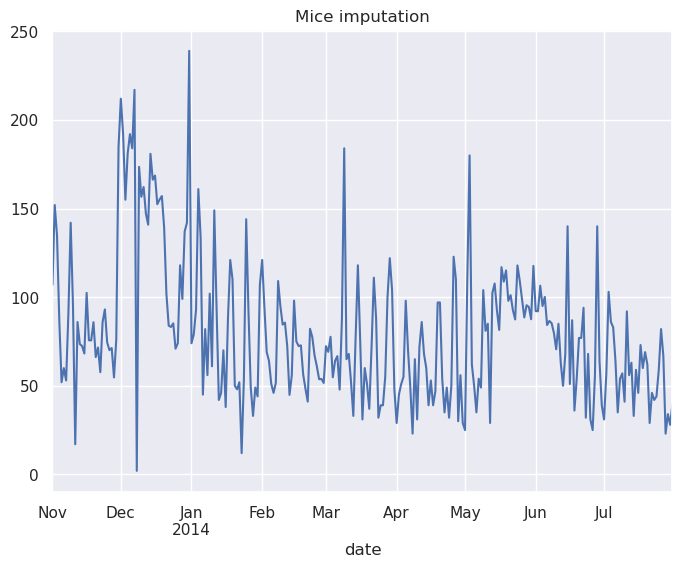

In [15]:
data_interpolate['sales'] = data_interpolate['sales'].interpolate()
data['2013-11':'2014-07']['sales'].plot()
plt.title('Mice imputation')
plt.show()